In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# List of ASEAN countries
asean_countries = [
    'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 
    'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'
]

# Oceanic countries in the AANZFTA
oceanic_countries = [
    'Australia', 'New Zealand'
]

# Combined list for AANZFTA
aanzfta_countries = asean_countries + oceanic_countries

In [4]:
#Getting Data Analyst and Data Scientist jobs in the AANZFTA Countries
df_DA_DS_AANZFTA = df[(df['job_title_short'].isin(['Data Analyst', 'Data Scientist'])) & (df['job_country'].isin(aanzfta_countries))].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_DS_AANZFTA  = df_DA_DS_AANZFTA.dropna(subset=['salary_year_avg'])

<Axes: >

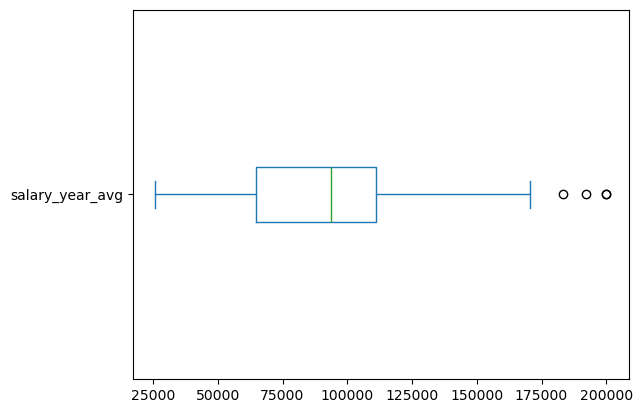

In [6]:
df_DA_DS_AANZFTA['salary_year_avg'].plot(kind='box', vert=False)

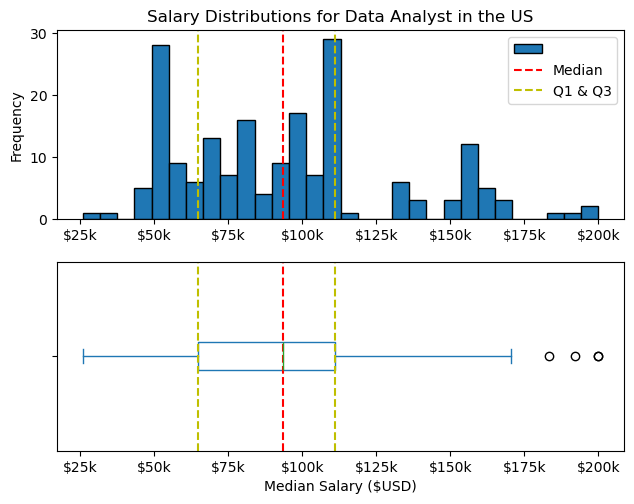

In [8]:
# plot histogram and boxplot for df_DA_DS_AANZFTA['salary_year_avg'] on same figure

fig, ax = plt.subplots(2, 1)
fig.tight_layout(h_pad=1)

df_DA_DS_AANZFTA['salary_year_avg'].plot(kind='hist', ax=ax[0], bins=30, edgecolor='black')
ax[0].set_title('Salary Distributions for Data Analyst in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[0].axvline(df_DA_DS_AANZFTA['salary_year_avg'].median(), color='r', linestyle='--')
ax[0].axvline(df_DA_DS_AANZFTA['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[0].axvline(df_DA_DS_AANZFTA['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
ax[0].legend(['', 'Median', 'Q1 & Q3'])


df_DA_DS_AANZFTA['salary_year_avg'].plot(kind='box', ax=ax[1], vert=False)
ax[1].set_yticklabels('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[1].axvline(df_DA_DS_AANZFTA['salary_year_avg'].median(), color='r', linestyle='--')
ax[1].axvline(df_DA_DS_AANZFTA['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[1].axvline(df_DA_DS_AANZFTA['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
plt.show()

In [9]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_AANZFTA = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'].isin(aanzfta_countries))].dropna(subset=['salary_year_avg'])

C:\Users\adinr\AppData\Local\Temp\ipykernel_7940\1193278631.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


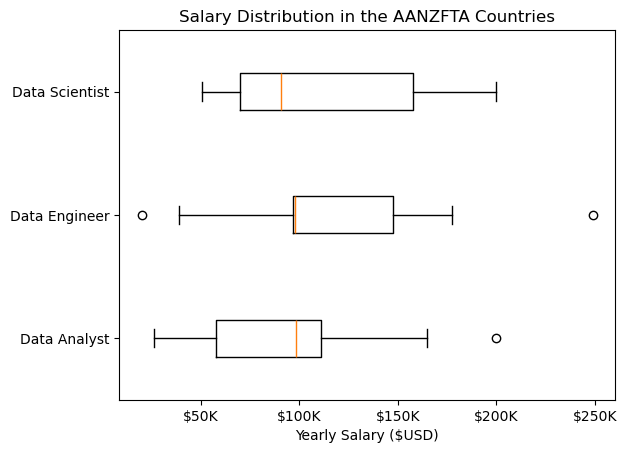

In [11]:
# list of salaries for each job title
job_list = [df_AANZFTA[df_AANZFTA['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the AANZFTA Countries')
plt.xlabel('Yearly Salary ($USD)')

ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()
